<a href="https://colab.research.google.com/github/shreyasat27/MSc-QT-/blob/main/exercise_2(AQM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

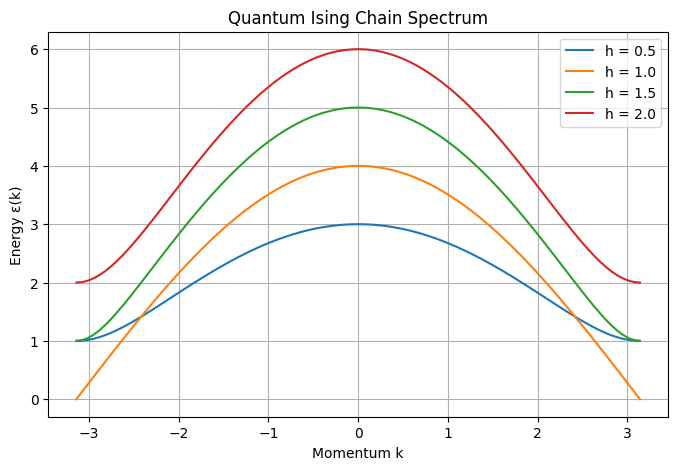

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
J = 1.0  # Interaction strength
N = 100  # Number of k-points
k = np.linspace(-np.pi, np.pi, N)  # Momentum values
h_values = [0.5, 1.0, 1.5, 2.0]  # Different transverse fields

# Compute and plot the spectrum
plt.figure(figsize=(8, 5))
for h in h_values:
    epsilon_k = 2 * np.sqrt((J * np.cos(k) + h)**2 + (J * np.sin(k))**2)
    plt.plot(k, epsilon_k, label=f"h = {h}")

plt.xlabel("Momentum k")
plt.ylabel("Energy ε(k)")
plt.title("Quantum Ising Chain Spectrum")
plt.legend()
plt.grid()
plt.show()

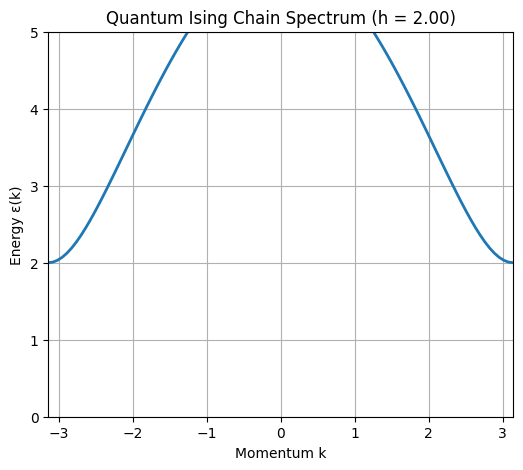

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

# Parameters
J = 1.0  # Interaction strength
h_values = np.linspace(0.5, 2.0, 20)  # Transverse field values for animation
N = 100  # Number of k-points

# Define k-space
k = np.linspace(-np.pi, np.pi, N)

# Initialize figure
fig, ax = plt.subplots(figsize=(6, 5))
line, = ax.plot([], [], lw=2)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(0, 5)
ax.set_xlabel("Momentum k")
ax.set_ylabel("Energy ε(k)")
ax.set_title("Quantum Ising Chain Spectrum")
ax.grid()

# Update function for animation
def update(frame):
    h = h_values[frame]
    epsilon_k = 2 * np.sqrt((J * np.cos(k) + h)**2 + (J * np.sin(k))**2)
    line.set_data(k, epsilon_k)
    ax.set_title(f"Quantum Ising Chain Spectrum (h = {h:.2f})")
    return line,

# Create animation
ani = FuncAnimation(fig, update, frames=len(h_values), interval=200, blit=True)

# Save animation as an MP4 file for Google Colab
ani.save("/content/ising_spectrum.mp4", writer=animation.FFMpegWriter(fps=5))

# Display the saved animation in Colab
from IPython.display import HTML
from base64 import b64encode

def display_video(filename):
    mp4 = open(filename, "rb").read()
    b64 = b64encode(mp4).decode()
    return HTML(f'<video controls loop autoplay><source src="data:video/mp4;base64,{b64}" type="video/mp4"></video>')

display_video("/content/ising_spectrum.mp4")
